Importing libraries

In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

Loading Dataset

In [4]:
data = keras.datasets.fashion_mnist

In [10]:
(train_images,train_labels),(test_images,test_labels) = data.load_data()

28 X 28 pixel images

In [13]:
print(train_images[7])

[[  0   0   0   0   0   1   1   0   0   0   0  63  28   0   0   0  33  85
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   2   0   0  28 126 241 255 255 255 255 255 255 252
  248 111   0   0   0   2   0   0   0   0]
 [  0   0   0   0   2   0   0 206 244 251 241 230 238 221 205 230 240 230
  239 251 233 165   0   0   2   0   0   0]
 [  0   0   0   1   0   0 199 251 228 234 233 236 235 245 247 237 234 239
  230 230 235 255 176   0   0   1   0   0]
 [  0   0   0   0   0  81 254 226 228 239 237 236 234 232 233 235 235 236
  239 237 233 225 246  73   0   0   0   0]
 [  0   0   3   0   0 255 235 239 223 234 238 236 237 236 235 235 235 235
  236 235 234 230 231 255  24   0   4   0]
 [  0   0   0   0 177 239 223 254 223 232 234 234 236 236 235 235 235 235
  235 234 231 233 222 246  88   0   1   0]
 [  0   0   0   0 234 239 229 255 220 232 233 232 234 235 235 235 235 235
  234 233 232 230 228 254 140   0   0   0]
 [  0   0   0   0 225 240 226 255 221 227 232 228 231 230 228 22

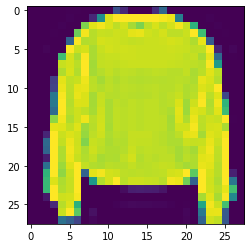

In [14]:
plt.imshow(train_images[7])
plt.show()

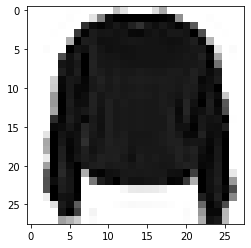

In [15]:
plt.imshow(train_images[7], cmap=plt.cm.binary)

In [7]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
print(class_names)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


## Shrinking the data
train_labels, test_labels don't need to be shrinked because their values already exist between 0 to 9

In [16]:
train_images = train_images/255.0
test_images = test_images/255.0

In [17]:
print(train_images[7])

[[0.         0.         0.         0.         0.         0.00392157
  0.00392157 0.         0.         0.         0.         0.24705882
  0.10980392 0.         0.         0.         0.12941176 0.33333333
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.00784314
  0.         0.         0.10980392 0.49411765 0.94509804 1.
  1.         1.         1.         1.         1.         0.98823529
  0.97254902 0.43529412 0.         0.         0.         0.00784314
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.00784314 0.
  0.         0.80784314 0.95686275 0.98431373 0.94509804 0.90196078
  0.93333333 0.86666667 0.80392157 0.90196078 0.94117647 0.90196078
  0.9372549  0.98431373 0.91372549 0.64705882 0.         0.
  0.00784314 0.         0.         0.        ]
 [0.         0.         0.         0.00392157 0.         0.
  0.78039216 0.

# Create Model

In [19]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(128, activation="relu"),
                          keras.layers.Dense(10, activation= "softmax")
])

In [20]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics = ["accuracy"])

In [22]:
model.fit(train_images,train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4984 - accuracy: 0.8233
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3752 - accuracy: 0.8648
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3356 - accuracy: 0.8769
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3101 - accuracy: 0.8855
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2964 - accuracy: 0.8909
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2800 - accuracy: 0.8979
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2668 - accuracy: 0.9012
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2563 - accuracy: 0.9048
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2481 - accuracy: 0.9077
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.238

Checking Accuracy

In [23]:
test_loss , test_acc = model.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3429 - accuracy: 0.8771


Predicts for all the test_images

In [26]:
prediction = model.predict(test_images)

Printing prediction of the image on index-7, which returns an array of confidence score for each neuron

In [29]:
print(prediction[7])

[4.7277404e-06 4.5546472e-10 1.1452672e-04 7.1254220e-07 8.0274381e-03
 1.2088582e-11 9.9185258e-01 5.9705756e-09 8.1528597e-09 7.9626776e-09]


The neuron with the highest confidence score is the predicted output

In [31]:
print(class_names[np.argmax(prediction[7])])

Shirt


Expected Output

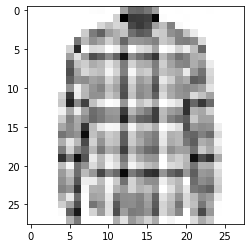

In [43]:
plt.imshow(test_images[7], cmap=plt.cm.binary)

Predicting & printing multiple predictions

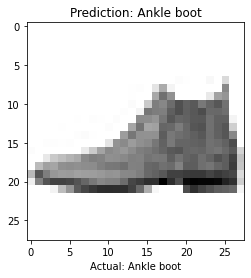

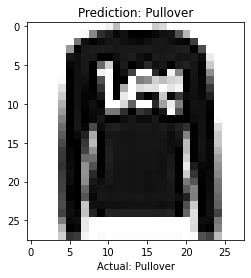

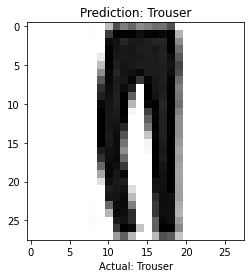

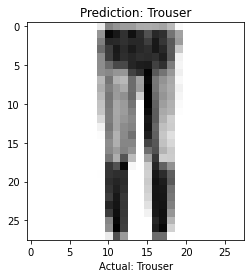

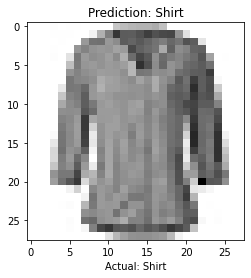

In [41]:
for i in range(5):
  plt.grid(False)
  plt.imshow(test_images[i], cmap=plt.cm.binary)
  plt.xlabel('Actual: '+ class_names[test_labels[i]])
  plt.title('Prediction: '+ class_names[np.argmax(prediction[i])])
  plt.show()